# Chapter 5: Residual Risk and Return: The Information Ratio

## Summary
 - The _information ratio_ measures achivement ex post (looking backward and connotes opportunity ex ante (looking forward).
 - the information ratio defines the _residual frontier_, the opportunities available to the active manager.
 - Each manager's information ratio and residual risk aversion determine his or her level og aggressiveness (residual risk).
 - _Intuition_ can lead to reasonable values for the information ratio and residual risk aversion.
 - _Value added_ depends on the manager's opportunities and aggressiveness.
***
- The Information Ratio IR is a measure of our opportunity
- The residual risk aversion is a measure of our willingness to exploit the opportunity


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

## The Definition of Alpha
 - Looking forward (ex ante), alpha is a forecast of residual return.
 - Looking backward (ex post), alpha is the average of the realized residual returns
- _Note_ the benchmark portfolio has a residual return of 0 e.g. $\theta_{b} = 0$
- _Note_ the risk-free portfolio also has zero residual return (alpha for cash = 0)

The term _alpha_ like _beta_ is from the use of linear regression to break return on a portfolio into component perfectly correlated with the benchmark and an uncorrelated or residual component.

$$\boxed{ r_{p}(t) = \alpha_{p} + \beta_{p} \cdot r_{b}(t) + \epsilon_{p}(t) }$$

The estimates of $\beta_{p}$ and $\alpha_{p}$ obtained from the regression are the _realized / historical_ beta and alpha.  The residual returns for the portfolio are

$$\boxed{ \theta_{p}(t) = \alpha_{p}  + \epsilon_{p}(t) }$$

## Information Ratio

**Historical**
- _information ratio_ denoted IR is a ratio of (annualised) residual return to (annualised) residual risk
- May be negative

**Looking forward - Typical Ratios**

| Percentile | Information Ratio |
|------------|-------------------|
| 90         |  1.0              |
| 75         |  0.5              |
| 50         |  0.0              |
| 25         | -0.5              |
| 10         | -1.0              |

Formally given an alpha for each stock and portfolio P will have portfolio $\alpha_{p}$ and residual risk $\omega_{p}$. The _information ratio_ for portfolio P

$$ \boxed{ IR_{p} = \frac{\alpha_{p}}{\omega_{p}} }$$




## The Residual Frontier ##

Effectively the information ratio defines a _budget constraint_ for the active manager with: &emsp; $\alpha_{p} = IR \cdot \omega_{p}$


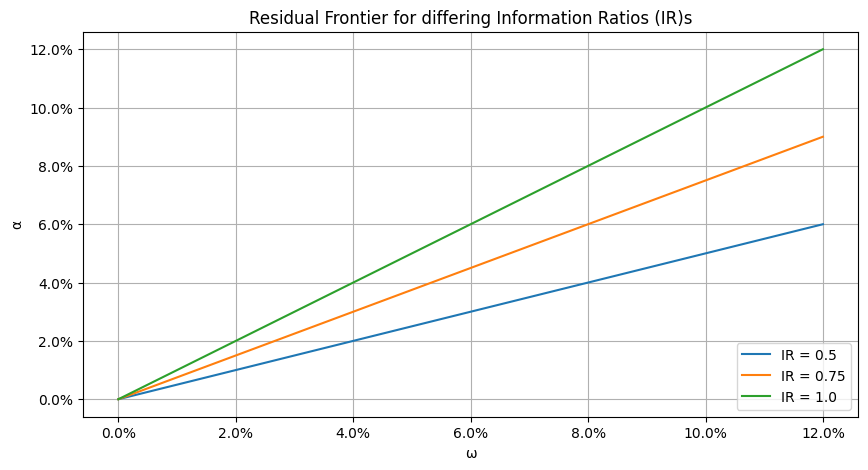

In [2]:
def alpha_for_ir(ir, omega_p):
     return ir * omega_p

omega_p = np.linspace(0, 0.12, 500)
ir_levels = [0.5, 0.75, 1.0]

plt.subplots(figsize=(10, 5))
for ir in ir_levels:
    plt.plot(omega_p, alpha_for_ir(ir,  omega_p), label=f'IR = {ir}')

plt.grid(True)
plt.title("Residual Frontier for differing Information Ratios (IR)s")
plt.xlabel("ω")
plt.ylabel("α")
plt.legend(loc='lower right')
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

## Active Management Objective
Maximize the value add from residual return where value add is measured as:

$$ \boxed{ VA[P] = \alpha_{p} - \lambda_{R} \cdot \omega_{p}^2 } $$

where $\lambda_{R}$ measures the aversion to residual risk (transforms residual variance into a loss in alpha)

Below demonstrates the loss in alpha for given lambdas

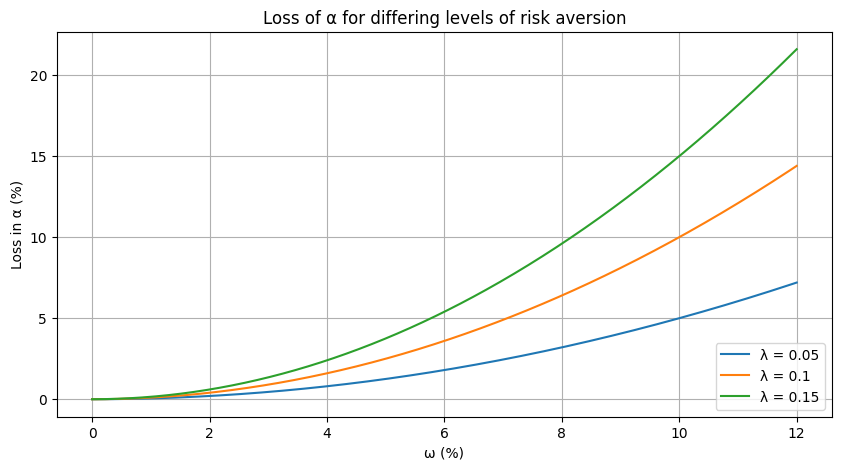

In [3]:
def alpha_for_theta(VA_p, theta_r, omega_p):
     return VA_p + theta_r * omega_p**2

omega_p = np.linspace(0, 12, 500)
lambda_residual_levels = [0.05, 0.10, 0.15]

plt.subplots(figsize=(10, 5))
for tr in lambda_residual_levels:
    plt.plot(omega_p, alpha_for_theta(0,  tr, omega_p), label=f'λ = {tr}')

plt.grid(True)
plt.title("Loss of α for differing levels of risk aversion")
plt.xlabel("ω (%)")
plt.ylabel("Loss in α (%)")
plt.legend(loc='lower right')
plt.show()

## Preferences Meet Opportunities

Example below given an IR = 0.75 we would like a risk-adjusted return (VA) of 2.5%. However that curve lies above the residual frontier - so the best that can achieved given those contraints is a VA of 1.4% (tangent to the curve at ω = 4%)

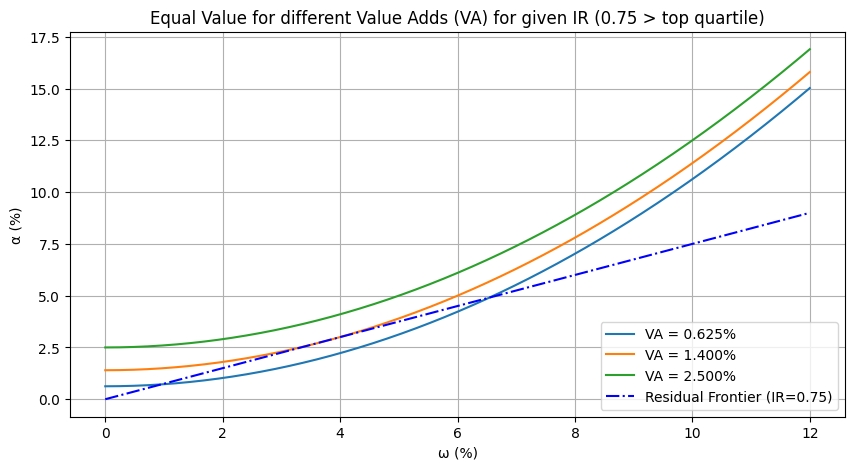

In [4]:
VA_levels = [0.625, 1.4, 2.5]

theta_r = 0.1
information_ratio = 0.75

plt.subplots(figsize=(10, 5))
for va in VA_levels:
    plt.plot(omega_p, alpha_for_theta(va, theta_r, omega_p), label=f'VA = {va:.3f}%')

# residual frontier
plt.plot(omega_p, omega_p*information_ratio, color='b', linestyle='-.', label=f'Residual Frontier (IR={information_ratio:.2f})')

plt.grid(True)
plt.title("Equal Value for different Value Adds (VA) for given IR (0.75 > top quartile)")
plt.xlabel("ω (%)")
plt.ylabel("α (%)")
plt.legend(loc='lower right')
plt.show()

## Optimal level of residual risk

Choosing a portfolio on the residual frontier - given managers level of aggressiveness:

$$ \boxed{ VA[\omega_{p}] = \omega_{p} \cdot IR - \lambda_{R} \cdot \omega_{p}^2 } $$

The optimal level of residual risk $\omega^{*}$ which maximizes $VA[\omega_{p}]$ is

$$ \boxed{ \omega^{*} = \frac{IR}{2 \lambda_{R}} }$$





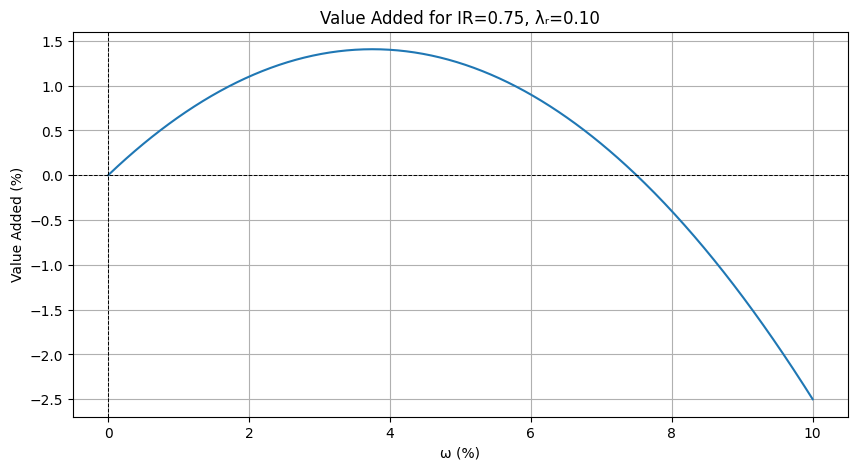

In [5]:
def va(omega_p, IR, lambda_r):
     return omega_p * IR - lambda_r * omega_p**2

omega_p = np.linspace(0, 10, 500)
ir = 0.75
lambda_r= 0.1

plt.subplots(figsize=(10, 5))
plt.plot(omega_p, va(omega_p, ir, lambda_r))

plt.grid(True)
plt.title(f'Value Added for IR={ir:.2f}, λᵣ={lambda_r:.2f}')
plt.xlabel("ω (%)")
plt.ylabel("Value Added (%)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.axvline(0, color='black', linestyle='--', linewidth=0.7)
plt.show()

**Residual Risk - Table**

| IR                 | λᵣ = 0.05 (Aggressive) | λᵣ = 0.10 (Moderate) | λᵣ = 0.15 (Restrained) |
|--------------------|------------------------|----------------------|------------------------|
| Exceptional (1.00) | 10.00 %                | 5.00 %               | 3.33 %                 |
| Very Good (0.75)   | 7.50 %                 | 3.75 %               | 2.50 %                 |
| Good (0.5)         | 5.00 %                 | 2.50 %               | 1.67 %                 |

**Value Added - Table**

| IR                 | λᵣ = 0.05 (Aggressive) | λᵣ = 0.10 (Moderate) | λᵣ = 0.15 (Restrained) |
|--------------------|------------------------|----------------------|------------------------|
| Exceptional (1.00) | 5.00 %                 | 2.50 %               | 1.67 %                 |
| Very Good (0.75)   | 2.81 %                 | 1.41 %               | 0.94 %                 |
| Good (0.5)         | 1.25 %                 | 0.63 %               | 0.42 %                 |



## Forecasting Alphas (Directly)

- Suggestion is rather than to compute estimate - use a simple ranking and then adjust against a benchmark average alpha to derive a _benchmark neutral_ alpha

| Rating      | alpha α |
|-------------|---------|
| Strong Buy  | 2.00 %  |
| Buy         | 1.00 %  |
| Hold        | 0.00 %  |
| Sell        | -1.00 % |
| Strong Sell | -2.00 % |


